In [282]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '256'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd, os, numpy as np
from scipy.stats import skew, kurtosis, entropy
from tqdm import tqdm
from sklearn.mixture import GaussianMixture as gmm
import networkx.algorithms.community as nx_comm
import networkx as nx
import json as js
import matplotlib.colors as mcolors


In [2]:
sns.set_style({'axes.facecolor': 'white',
         'axes.edgecolor': 'black',
        'axes.grid': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'figure.facecolor':"white",
        'axes.labelcolor': '.15',
         'grid.color': 'white',
         'grid.linestyle': '-',
         'text.color': '.15',
         'xtick.color': '.15',
         'ytick.color': '.15',
        'patch.edgecolor': 'white',})

In [334]:
#os.makedirs(TAR_DIR + "n_cpnts_ts")
os.listdir(TAR_DIR)

['opinions_init', 'opinions', 'n_cpnts_ts', 'individual', 'entropy_timeseris']

In [3]:
ROOT_DIR = "/N/slate/harryan/sim_data/"
TAR_DIR = "/N/slate/harryan/sim_data_extra/"
OP_DIR = f"{TAR_DIR}opinions"

In [4]:
Ns = ["N"+str(i) for i in range(6)]
op_folders = []
for n in Ns:
    n_f = ROOT_DIR+f"{n}/"
    folders = os.listdir(n_f)
    for f in folders:
        op_folders.append(f"{n}/{f}/opinions/")

In [5]:
def entropy_continuous(x, nbins=100):
    # Define bins
    bins = np.linspace(-1, 1, nbins+1)
    
    # Bin the data
    counts, _ = np.histogram(x, bins)
    
    # Compute proportions
    props = counts / np.sum(counts)
    
    # Compute entropies
    eps = np.finfo(float).eps # small number to avoid log(0)
    entropies = -props * np.log2(props+eps)
    
    # Compute total entropy
    entropy = np.sum(entropies)
    
    return entropy

In [6]:
entropies = {}
op_files = os.listdir(OP_DIR)
for f in tqdm(op_files):
    df = pd.read_parquet(OP_DIR+f"/{f}")
    entropies[tuple(f.split("_")[:2])] =  df.apply(entropy_continuous, axis = 0)

100%|██████████| 78/78 [00:09<00:00,  7.88it/s]


In [8]:
entropies = pd.DataFrame(entropies).T

,,88,52,47,12,74,51,46,73,11,66,...,32,20,62,33,84,2,4,24,81,98
N1,s5eta5,5.197331,4.762429,5.273557,4.807853,4.779765,4.946919,5.069215,5.055302,5.175246,4.972023,...,4.743857,4.939331,5.323723,5.116744,5.181907,5.149855,4.906389,5.243508,5.023375,5.255812
N5,s9eta2,5.570910,5.781555,5.871086,5.858303,5.644468,5.694607,5.773235,5.480019,5.618195,5.824847,...,5.713461,5.802633,5.759167,5.492576,5.798681,5.894359,5.749338,5.631114,5.835712,5.532575
N2,s3eta8,4.848047,4.920078,4.875637,5.063305,4.883145,4.741726,4.934367,4.927209,4.980930,5.095016,...,4.875693,4.888207,4.905631,4.973759,4.911531,4.848857,4.806774,5.269275,4.873137,4.777084
N3,s9eta5,5.159660,5.085245,5.114339,5.273528,5.127209,5.031296,4.944374,4.789046,4.962334,4.695016,...,5.013528,5.202265,5.040078,4.891112,4.983477,4.928001,5.122565,5.176406,5.052788,5.094758
N4,s1eta8,4.832351,4.848442,5.191197,4.904402,5.339933,4.926468,4.859918,4.889174,5.372455,5.042565,...,4.815338,5.163496,5.231014,4.796015,4.953761,5.088086,4.754436,5.017404,4.779500,5.122306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N5,s7eta8,4.887725,5.059241,4.814017,4.827467,5.422725,4.716216,5.055756,5.187209,4.747209,4.734625,...,4.997996,4.975784,5.177173,5.362048,4.961335,5.276164,5.282306,5.314499,4.868031,4.983333
N2,s5eta8,4.743822,5.065888,4.787627,5.050114,4.892111,4.822565,5.196175,4.839891,5.188626,5.218821,...,5.052529,4.937432,5.111531,4.856015,5.124116,4.768047,4.949883,5.177446,4.955176,4.862306
N3,s5eta2,5.762086,5.651277,5.769441,5.523499,5.639182,5.725351,5.689704,5.743548,5.718152,5.738573,...,5.640983,5.605420,5.646732,5.316202,5.686582,5.693620,5.533919,5.828973,5.597775,5.669867
N5,s5eta5,5.519401,5.596560,5.360278,5.542889,5.534370,5.139429,5.247209,4.982642,5.726112,5.231237,...,5.497173,5.391272,5.775525,5.739460,5.365391,5.112529,5.109733,5.041077,5.130573,5.030022


In [18]:
pd.read_parquet(OP_DIR+f"/{f}")

,88,52,47,12,74,51,46,73,11,66,...,32,20,62,33,84,2,4,24,81,98
0,-0.224139,0.024365,0.844777,0.281666,-0.799473,0.473580,0.771908,-0.237010,0.157889,-0.432422,...,-0.982900,0.350082,-0.862652,-0.491498,-0.573964,-0.547390,-0.548658,-0.513558,0.993972,0.247530
1,0.004588,0.862549,1.952424,1.183489,-0.677967,-0.516322,-0.344314,0.815724,1.024763,0.773893,...,-0.145894,1.706487,-0.528323,0.710038,1.116214,-0.704919,-0.528589,-1.189784,0.784201,1.040688
2,0.093946,0.456072,0.028486,-0.564094,-0.966180,-0.910894,-1.799897,1.006141,1.019625,-0.130380,...,-0.103795,0.570816,-0.939346,0.974582,0.444483,-0.908508,-0.375448,0.934992,-0.793291,1.614890
3,0.789802,0.461385,-0.393254,1.690038,-0.316976,-0.053262,0.232132,-0.027776,-1.303583,-0.941866,...,0.596066,0.200545,-0.542819,-1.194230,-0.344686,0.215780,-0.474656,-1.199373,1.846771,1.537657
4,-0.182614,-0.254669,-1.228393,0.465577,0.711686,0.258386,1.020007,1.362595,0.697353,-1.182914,...,1.179338,0.545379,-1.621153,-1.591780,0.492358,-1.547895,0.400552,0.795329,-0.444801,0.482855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.291054,0.476973,0.759882,0.301717,-1.619398,-1.694780,1.380042,-0.319495,-1.967172,-0.820565,...,1.972283,0.726204,-0.836800,-0.880651,-0.663951,-0.715785,0.023175,-0.168152,-0.222269,0.220592
96,1.218682,-1.044441,0.664572,-1.071626,0.683156,0.225201,-0.119993,0.827199,0.942240,1.273402,...,0.727161,-0.776081,0.253131,-0.945979,0.095690,-0.824028,0.049170,-0.719114,1.395672,-1.764037
97,0.717998,0.890339,0.001447,1.293044,-0.953928,-0.759382,-1.551815,0.356304,0.532646,1.653872,...,-0.589303,-0.710102,-0.702353,1.836777,-1.573799,-0.253259,0.189735,-0.185312,-0.778336,-0.446889
98,0.465935,0.085495,-0.282509,0.490111,0.505691,0.640284,0.487921,0.756906,-0.089155,-0.247592,...,1.055166,1.148347,0.698163,-1.175428,0.617144,-0.517030,-1.263142,0.694998,-1.846975,-0.556285


In [36]:
Ns = ["N"+str(i) for i in range(6)]
data_folders = []
for n in Ns:
    n_f = ROOT_DIR+f"{n}/"
    folders = os.listdir(n_f)
    for f in folders:
        data_folders.append(f"{n}/{f}")

In [96]:
def entropies_folder(folder, iterations =100):
    time_index = [f"Time_{str(i)}" for i in range(10000)]
    entropies =[]
    for iteration in range(iterations):
        f_dir = f"{ROOT_DIR}{folder}/opinions/{str(iteration)}_opinions.parquet"
        #print(f_dir)
        op = pd.read_parquet(f_dir)
        entropy_one_iter = op.apply(entropy_continuous, axis = 0)
        one_iter_reindex = entropy_one_iter.reindex(time_index, fill_value= np.nan)
        one_iter_fillna = one_iter_reindex.fillna((one_iter_reindex.ffill() + one_iter_reindex.bfill()) / 2)
        entropies.append(one_iter_fillna)
    entropies_df = pd.concat(entropies, axis = 1)
    return entropies_df

In [97]:
data_folders[0]

'N0/s0eta8'

In [98]:
res = entropies_folder(data_folders[0], iterations=3)

In [99]:
res

,0,1,2
Time_0,5.911014,5.877564,5.767369
Time_1,5.911014,5.877564,5.767369
Time_2,5.911014,5.877564,5.767369
Time_3,5.911014,5.877564,5.767369
Time_4,5.911014,5.877564,5.767369
...,...,...,...
Time_9995,4.672628,5.135038,4.869624
Time_9996,4.672628,5.143168,4.857173
Time_9997,4.668982,5.143168,4.857173
Time_9998,4.642083,5.149784,4.859241


In [64]:
filled = entropy_one_iter.reindex(time_index, fill_value= np.nan)

In [66]:
de_na = filled.fillna((filled.ffill() + filled.bfill()) / 2)

In [95]:
res

Time_0       5.851982
Time_1       5.851982
Time_2       5.851982
Time_3       5.851982
Time_4       5.851982
               ...   
Time_9995    4.892430
Time_9996    4.890990
Time_9997    4.889774
Time_9998    4.883703
Time_9999    4.882143
Length: 10000, dtype: float64

In [106]:
ets_files = os.listdir(TAR_DIR + "entropy_timeseris")

In [110]:
eta5_files = [f for f in ets_files if "eta5" in f]

In [114]:
N1_etas = sorted(eta5_files)[:6]
N1_res = [pd.read_parquet(TAR_DIR + "entropy_timeseris/" + i).mean(axis = 1) for i in N1_etas]

In [121]:
N1_df = pd.concat(N1_res, axis = 1)
N1_df.columns = ["No media"] + [str(i*10)+"%" for i in [1, 3, 5, 7, 9]]

In [149]:
colors = [
 "#abc9c8",
 "#72aeb6",
 "#4692b0",
 "#2f70a1",
 "#134b73",
 "#0a3351"
]
marker_styles = ['o', 's', '^', '*', 'D', 'P']


[Text(0, 0, '0'),
 Text(2000, 0, '2000'),
 Text(4000, 0, '4000'),
 Text(6000, 0, '6000'),
 Text(8000, 0, '8000'),
 Text(10000, 0, '10000')]

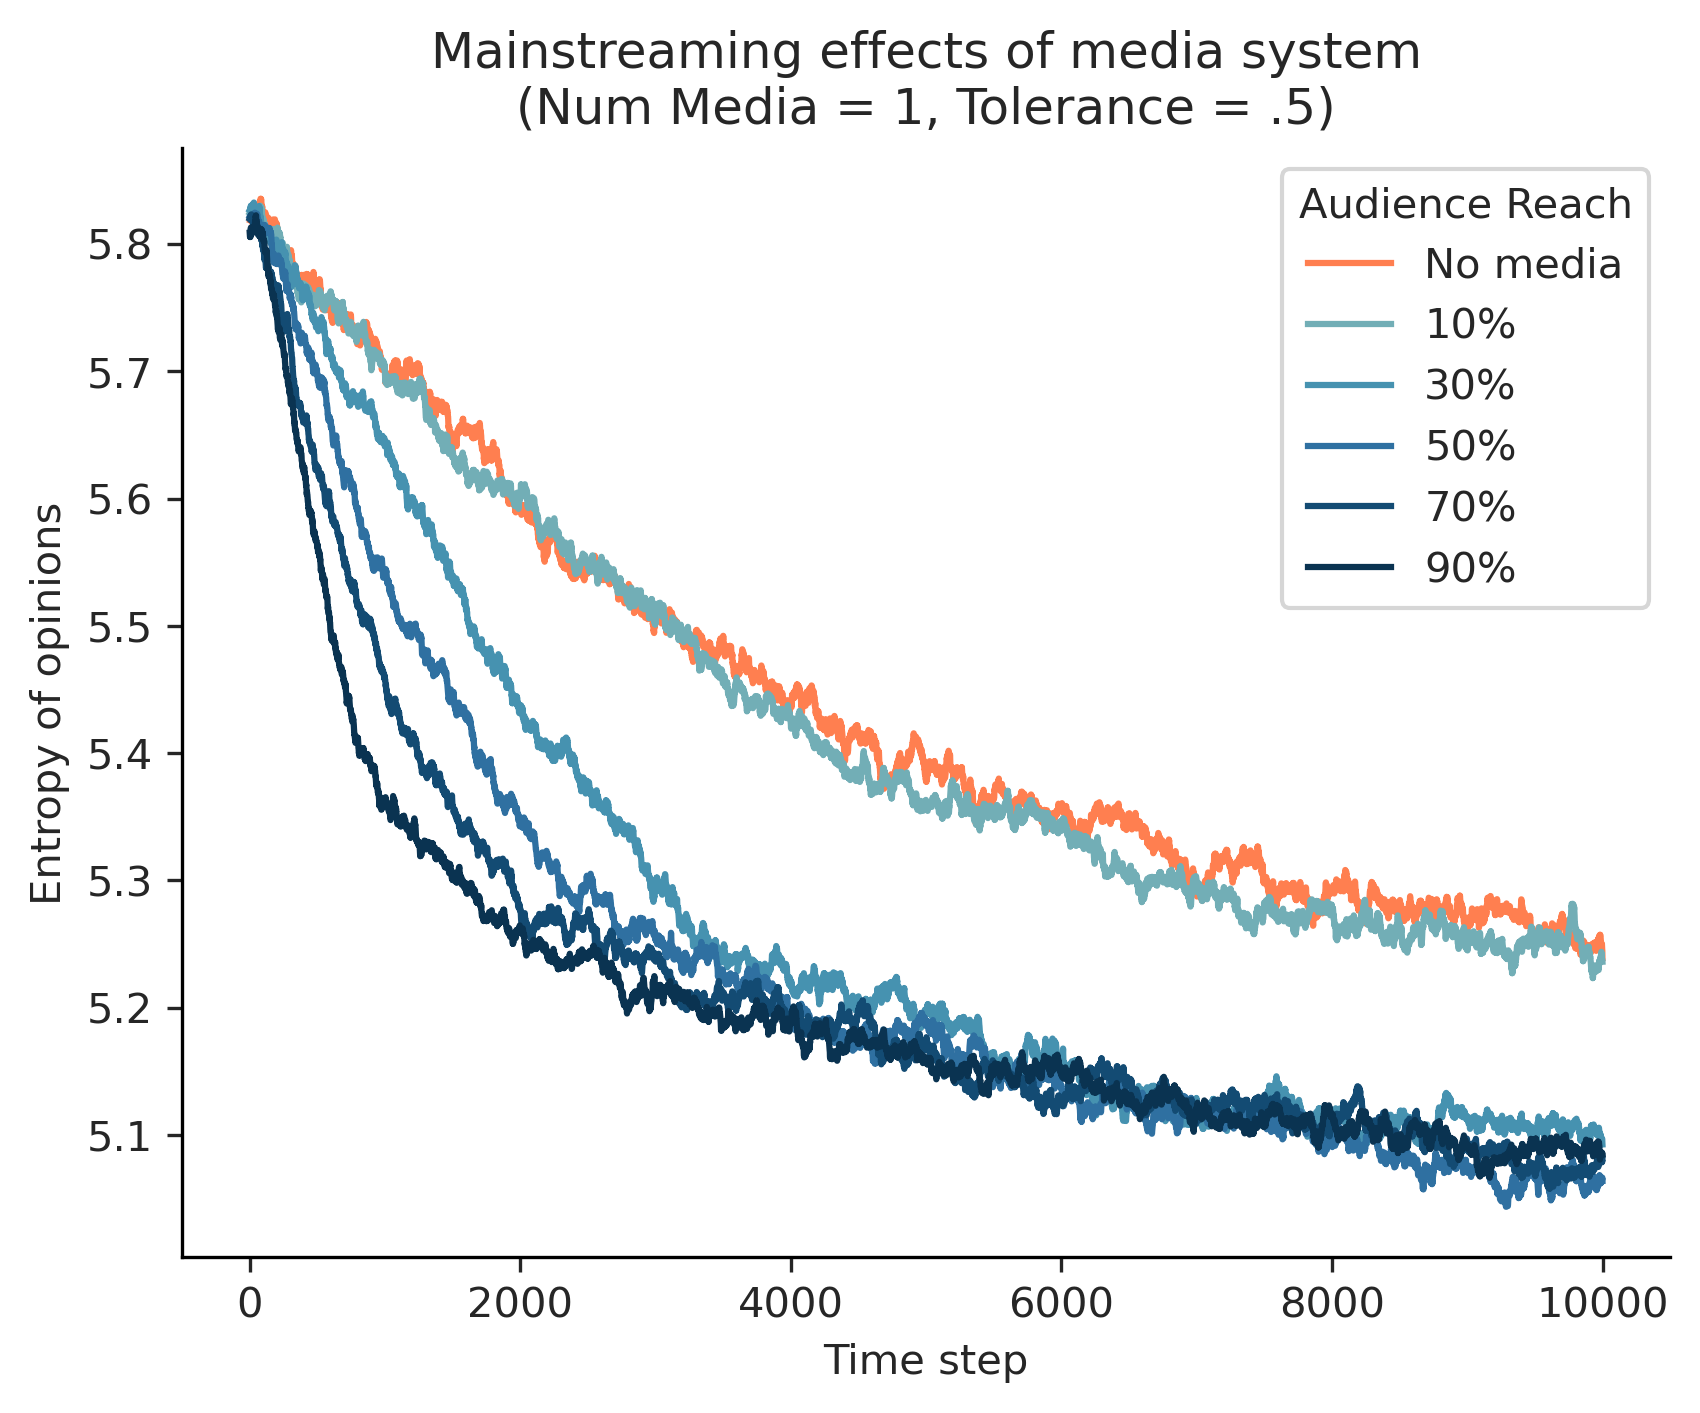

In [176]:
fig, ax = plt.subplots(1, 1, dpi = 300)
cs = ["coral"]+colors[1:6]
markers = ['o', 'x', 'x', 'x', 'x', 'x']
for i, col in enumerate(N1_df.columns):
    N1_df[col].plot(color=cs[i], ax=ax, label=col) #marker=markers[i] markersize = 5
ax.legend(title = "Audience Reach")
ax.set_title("Mainstreaming effects of media system\n(Num Media = 1, Tolerance = .5)")
ax.set_ylabel("Entropy of opinions")
ax.set_xlabel ("Time step")
ax.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax.set_xticklabels([0, 2000, 4000, 6000, 8000, 10000])

In [324]:
def n_cpnts_folder(folder):
    time_index = [f"Time_{str(i)}" for i in range(10000)]
    n_folder =[]
    for iteration in range(95, 97):
        f_dir = f"{folder}/networks/{str(iteration)}_networks.json"
        #print(f_dir)
        with open(f_dir, 'r') as f:
            networks =  js.load(f)
        n_iter = {}
        print(iteration)
        for timestep, edgelist in networks.items():
            g_t = nx.from_edgelist(edgelist, create_using= nx.Graph)
            n_t = nx.number_connected_components(g_t)
            n_iter[timestep] = n_t
        n_iter = pd.Series(n_iter)
        n_iter = n_iter.reindex(time_index, fill_value= np.nan)
        n_iter = n_iter.fillna(n_iter.ffill())
        n_folder.append(n_iter)
    n_df = pd.concat(n_folder, axis = 1)
    return n_df

In [325]:
Ns = ["N" + str(i) for i in range(6)]
data_folders = []
for n in Ns:
    n_f = ROOT_DIR+f"{n}/"
    folders = os.listdir(n_f)
    for f in folders:
        data_folders.append(f"{n_f}{f}")

In [326]:
def run_n_cpnts_ts(e, s):
    for folder in data_folders[e:s]:
        #f = folder.split("/")[-2:]
        #for iteration in range(100):
        df_res = n_cpnts_folder(folder)
        #df_res.to_parquet(TAR_DIR + f"/n_cpnts_ts/{''.join(f)}.parquet")
    return df_res 

In [329]:
data_folders[2:3]

['/N/slate/harryan/sim_data/N0/s0eta5']

In [330]:
test = run_n_cpnts_ts(2, 3)

95
96


In [331]:
test

,0,1
Time_0,1.0,1.0
Time_1,1.0,1.0
Time_2,1.0,1.0
Time_3,1.0,1.0
Time_4,1.0,1.0
...,...,...
Time_9995,2.0,1.0
Time_9996,2.0,1.0
Time_9997,2.0,1.0
Time_9998,2.0,1.0


In [222]:
test

,0,1,2,3,4,5,6,7,8,9
Time_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Time_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Time_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Time_3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Time_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
Time_9995,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Time_9996,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Time_9997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Time_9998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [239]:
folder = "/N/slate/harryan/sim_data/N0/s0eta5"
iteration = np.random.randint(0, 100)
print(folder, iteration)
f_dir = f"{folder}/opinions/{str(iteration)}_opinions.parquet"
        #print(f_dir)
op = pd.read_parquet(f_dir)

/N/slate/harryan/sim_data/N0/s0eta5 95


In [248]:
nt_dir  = f"{folder}/networks/{str(iteration)}_networks.json"
with open(nt_dir, "r") as f:
    last_edgelist = js.load(f)[op.columns[-1]]
g_t = nx.from_edgelist(last_edgelist, create_using= nx.Graph)
n_t = nx.number_connected_components(g_t)
print(n_t)

2


Text(0.5, 0.95, 'Baseline ')

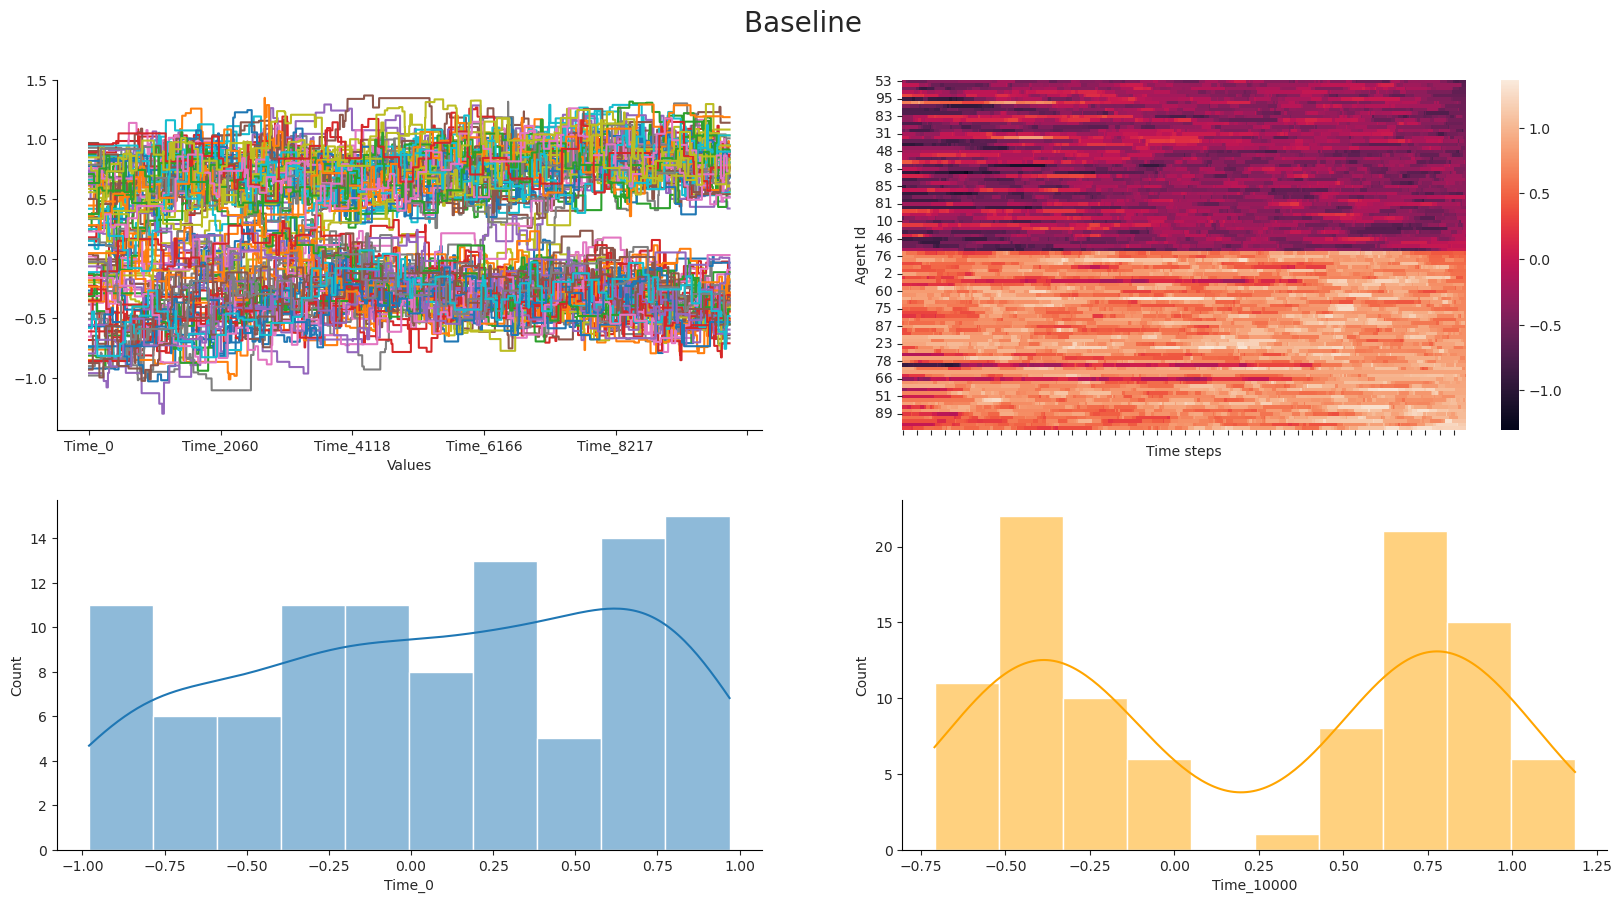

In [241]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
axes = axes.flatten()
op.T.plot(figsize = (20,10), ax = axes[0])
axes[0].legend().remove()
axes[0].set_xlabel("Values")
sns.heatmap(op.sort_values(by = op.columns[-1]), ax = axes[1])
#axes[1].set_title("Baseline", fontsize = 26)
axes[1].set_ylabel("Agent Id")
axes[1].set_xlabel("Time steps")
#axes[1].set_xticks(np.arange(10))
axes[1].set_xticklabels([])
#axes[1].set_title("Baseline Consensus", fontsize = 26)
sns.histplot(op.Time_0, bins = 10, ax = axes[2], kde= True)
sns.histplot(op[op.columns [-1]], bins = 10, ax = axes[3], kde = True, color = "orange")
plt.suptitle("Baseline ", y = .95, fontsize = 20)

#ax.set_title("eta = {}, T/c = {}, condition = Polarized".format(str(eta), str(np.around(T/c,2))))


In [ ]:
cmap = plt.cm.bwr
norm = mcolors.Normalize(vmin=min(last), vmax=max(last))
node_colors = {node: cmap(norm(last.loc[node])) for node in last.index}

(array([11., 22., 10.,  6.,  0.,  1.,  8., 21., 15.,  6.]),
 array([-0.70988353, -0.52028132, -0.33067912, -0.14107691,  0.0485253 ,
         0.2381275 ,  0.42772971,  0.61733191,  0.80693412,  0.99653632,
         1.18613853]),
 <BarContainer object of 10 artists>)

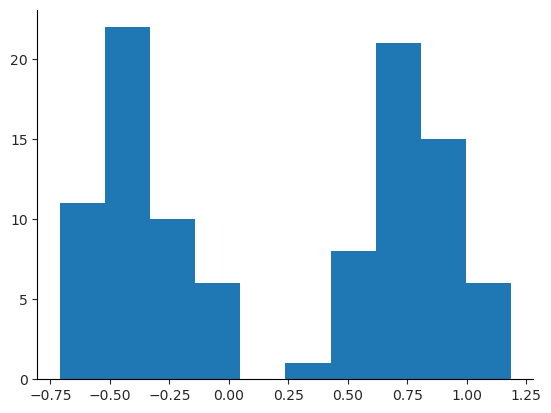

In [293]:
plt.hist(last)

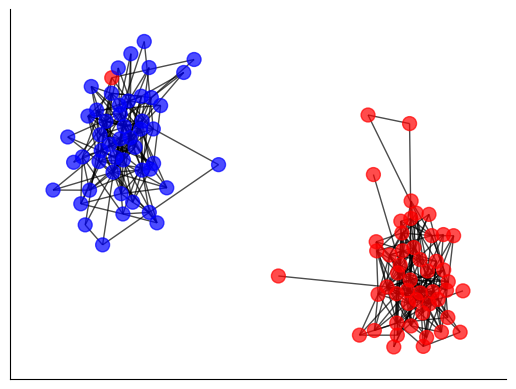

In [311]:
#G= nx.from_edgelist(sm.Network_db["Time_{}".format(str(T-1))], create_using= nx.DiGraph)
last = op[op.columns[-1]]
pos = nx.spring_layout(g_t,  k = .4, iterations= 70)
nodes_color = np.where(last[list(g_t.nodes)] > .4, "red", "blue")
nx.draw_networkx(g_t, pos = pos, alpha =.7, with_labels = False, node_size = 100, node_color = nodes_color)


In [288]:
node_colors

{0: (1.0, 0.3294117647058824, 0.3294117647058824, 1.0),
 1: (0.21176470588235294, 0.21176470588235294, 1.0, 1.0),
 2: (1.0, 0.6509803921568628, 0.6509803921568628, 1.0),
 3: (0.32941176470588235, 0.32941176470588235, 1.0, 1.0),
 4: (1.0, 0.46274509803921593, 0.46274509803921593, 1.0),
 5: (1.0, 0.3529411764705882, 0.3529411764705882, 1.0),
 6: (0.2823529411764706, 0.2823529411764706, 1.0, 1.0),
 7: (0.16470588235294117, 0.16470588235294117, 1.0, 1.0),
 8: (0.34509803921568627, 0.34509803921568627, 1.0, 1.0),
 9: (1.0, 0.5254901960784314, 0.5254901960784314, 1.0),
 10: (0.5333333333333333, 0.5333333333333333, 1.0, 1.0),
 11: (1.0, 0.25098039215686274, 0.25098039215686274, 1.0),
 12: (0.6274509803921569, 0.6274509803921569, 1.0, 1.0),
 13: (0.4156862745098039, 0.4156862745098039, 1.0, 1.0),
 14: (1.0, 0.807843137254902, 0.807843137254902, 1.0),
 15: (0.39215686274509803, 0.39215686274509803, 1.0, 1.0),
 16: (0.5176470588235293, 0.5176470588235293, 1.0, 1.0),
 17: (1.0, 0.4392156862745098